## Importando base de dados

In [87]:
import pandas as pd

In [88]:
dados = pd.read_csv('tips.csv')

In [89]:
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


## Tradução 

In [90]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [91]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'   
}

In [92]:
gorjetas = dados.rename(columns = renomear)

In [93]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [94]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [95]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [96]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [97]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [98]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [99]:
dias = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur' : 'Quinta', 
    'Fri' : 'Sexta'
}

In [100]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [101]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [102]:
hora = {
    'Dinner' : 'Janta', 
    'Lunch' : 'Almoço'
}

In [103]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4


## Importando o Seaborn

In [104]:
!pip install seaborn==0.9.0

In [105]:
import seaborn as sns

In [106]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\anaconda\lib\site-packages
Requires: pandas, scipy, matplotlib, numpy
Required-by: 


## Análise I: Valor da conta e gorjeta

In [107]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

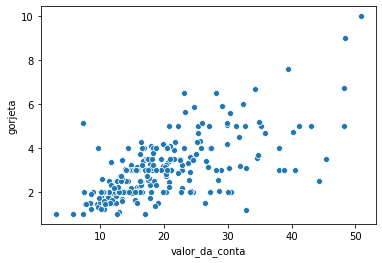

In [108]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

#### **visualmente o valor da gorjeta aumenta conforme o valor da conta**

In [109]:
print('A base de dados contem {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')

A base de dados contem 244 registros 

Registros não nulos


## Criando o campo porcentagem

In [110]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [111]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.059447
1,10.34,1.66,Não,Domingo,Janta,3,0.160542
2,21.01,3.50,Não,Domingo,Janta,3,0.166587
3,23.68,3.31,Não,Domingo,Janta,2,0.139780
4,24.59,3.61,Não,Domingo,Janta,4,0.146808


In [112]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [113]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


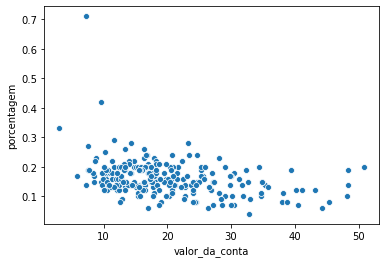

In [114]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

### **Visualmente o valor da conta não é proporcional à gorjeta recebida**

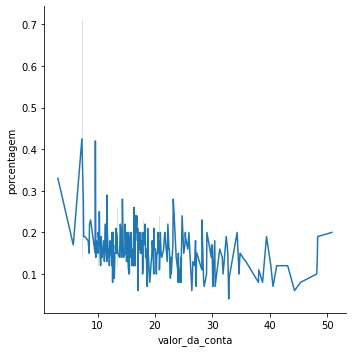

In [115]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line',data = gorjetas)

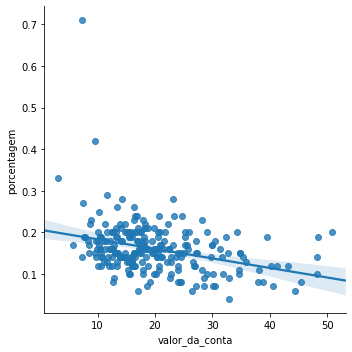

In [116]:
sns.lmplot(x='valor_da_conta', y = 'porcentagem', data = gorjetas)

## Análise 2: Sobremesa

In [117]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


In [118]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [119]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


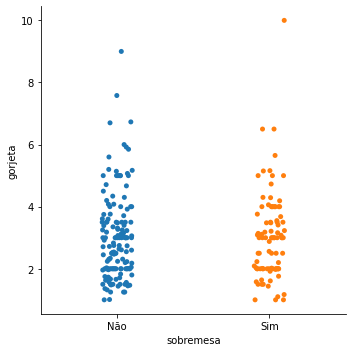

In [120]:
sns.catplot(x = 'sobremesa', y ='gorjeta', data =gorjetas)

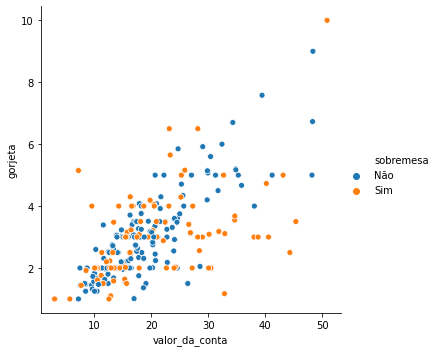

In [121]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

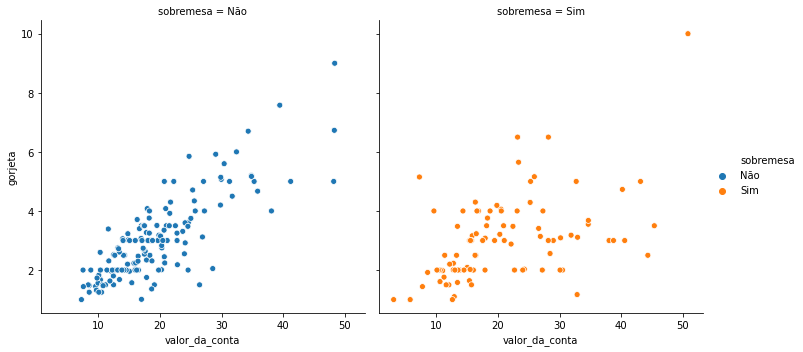

In [122]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

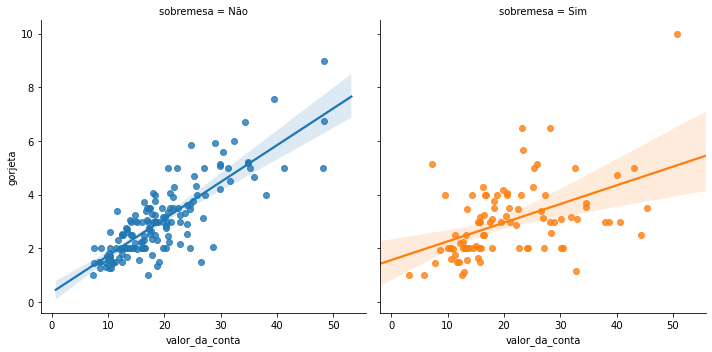

In [123]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

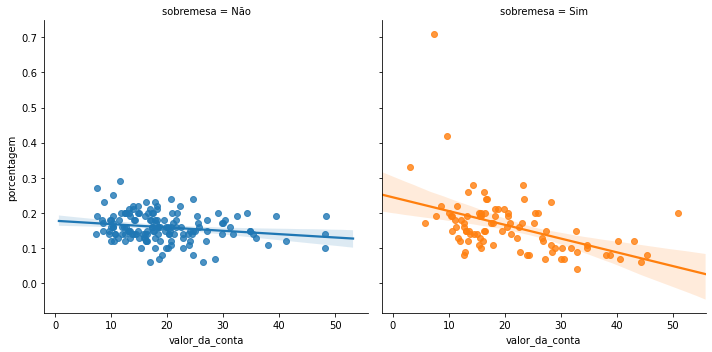

In [124]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

## **Visualmente existe uma diferença no valor das gorjetas nos que pediram gorjeta e nos que não pediram**

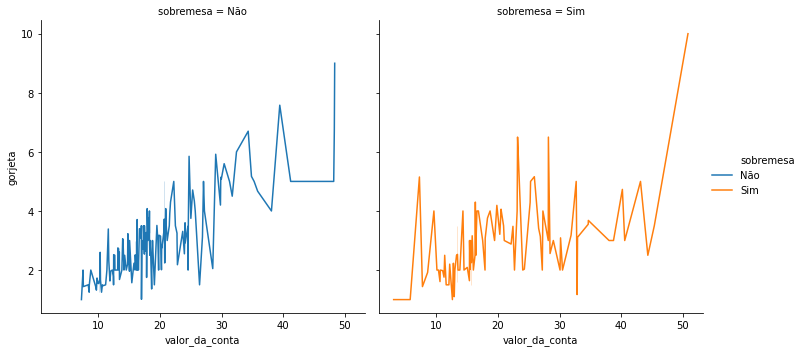

In [125]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', kind = 'line', data = gorjetas)

## Teste de hipótese

### A distribuição da taxa da gorjeta é a mesma nos dois grupos 
### ou
### A distribuição da taxa da gorjeta não é a mesma nos dois grupos 

In [126]:
from scipy.stats import ranksums

In [127]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [128]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [129]:
r = ranksums(sobremesa, sem_sobremesa)

In [130]:
print('O valor do pvalue é {}'.format(r.pvalue))

O valor do pvalue é 0.5266635660124415


### A distribuição da taxa da gorjeta é a mesma nos dois grupos 

## Análise 3 - Dia da Semana

In [131]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

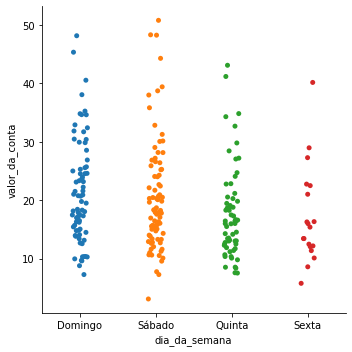

In [132]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

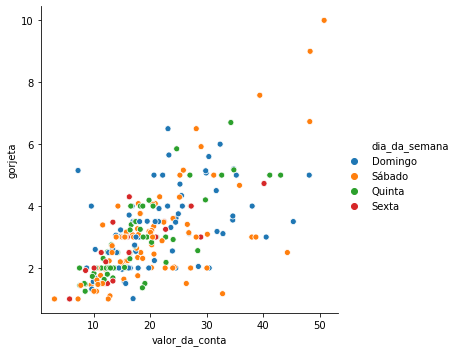

In [133]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

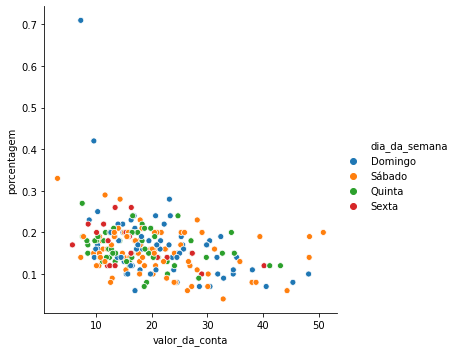

In [134]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

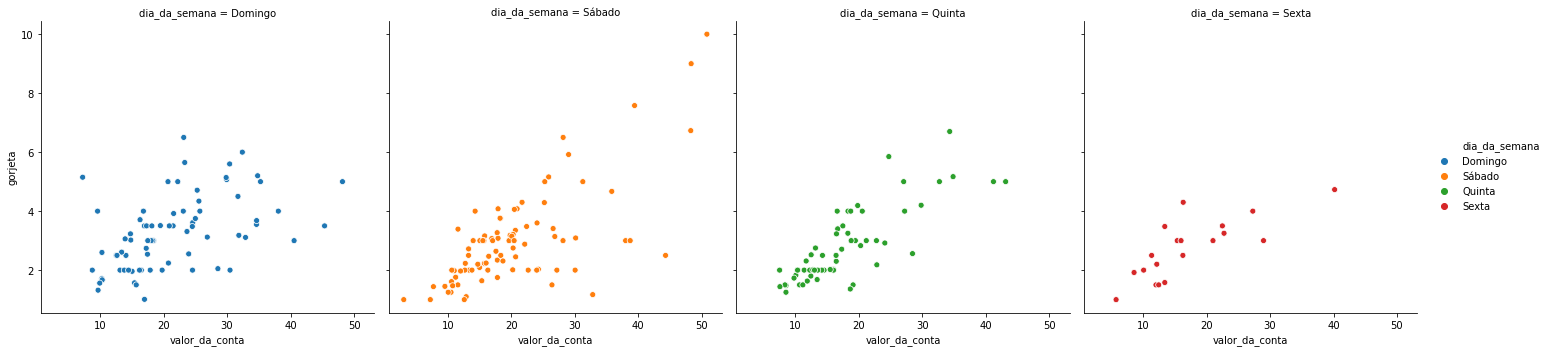

In [135]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

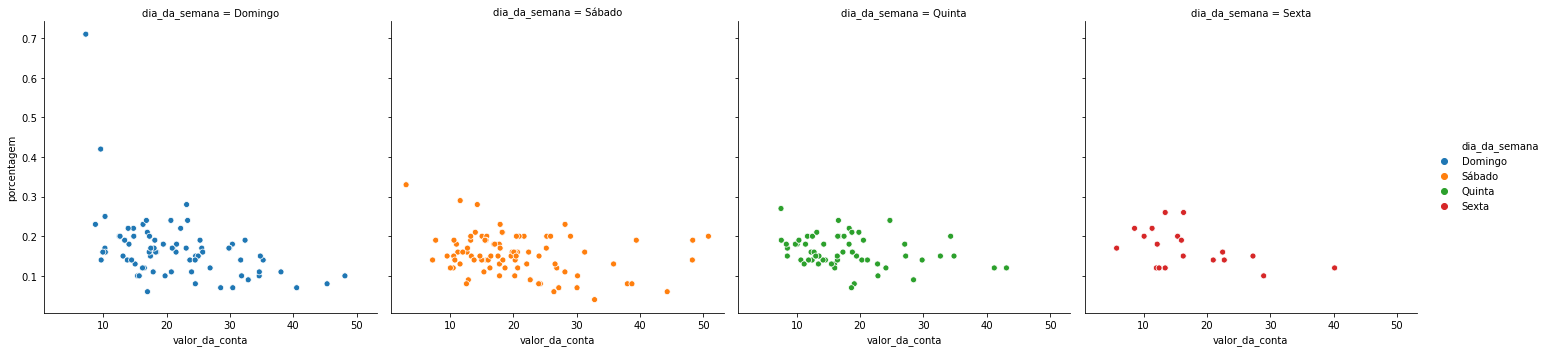

In [136]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

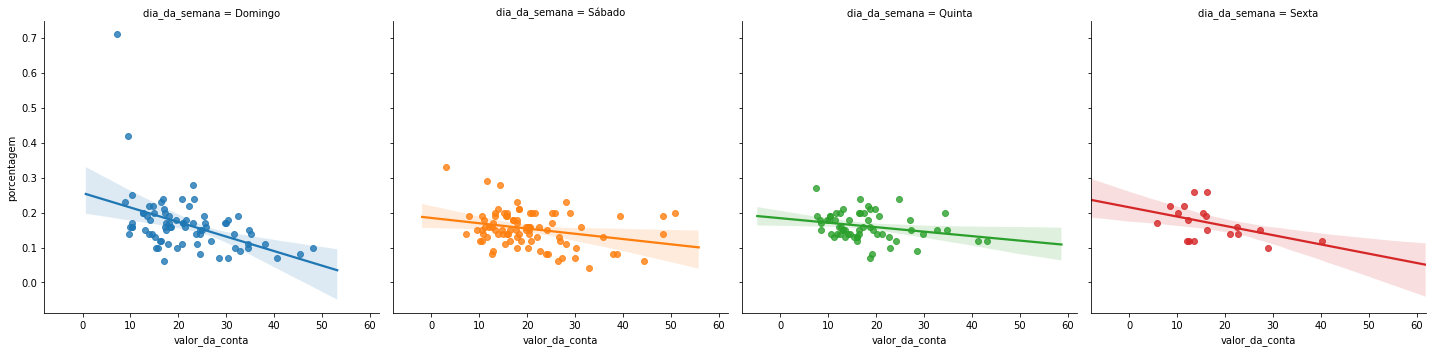

In [137]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [138]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [139]:
print('A média geral das gorjetas é {}'.format(media_geral_gorjetas))

A média geral das gorjetas é 2.9982786885245902


In [140]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [141]:
print('Frequencia dos dias')
gorjetas.dia_da_semana.value_counts()

Frequencia dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de hipótese

### A distribuição do valor da conta é igual no sábado e no domingo
### ou
### A distribuição do valor da conta não é igual no sábado e no domingo

In [142]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [143]:
valor_conta_sábado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [144]:
r2 = ranksums(valor_conta_domingo, valor_conta_sábado)
print('O valor do pvalue é {}'.format(r2.pvalue))

O valor do pvalue é 0.3576728477868443


#### pvalue > 0.05, então A distribuição do valor da conta é igual no sábado e no domingo

## Análise IV - Hora do dia

In [145]:
gorjetas.hora_do_dia.unique()

array(['Janta', 'Almoço'], dtype=object)

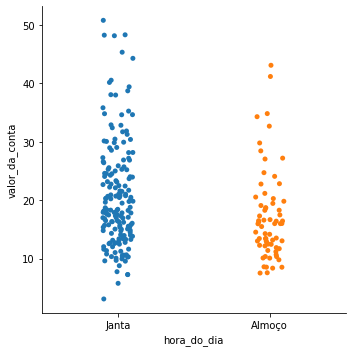

In [146]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

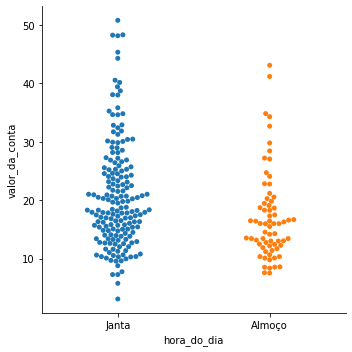

In [147]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', kind = 'swarm',data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

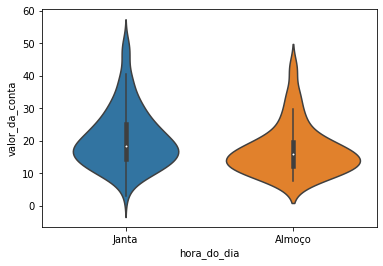

In [148]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

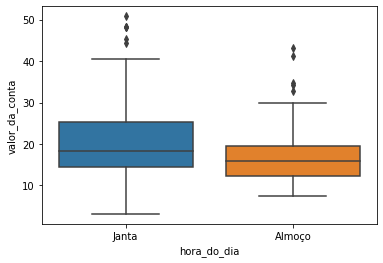

In [149]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

In [152]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

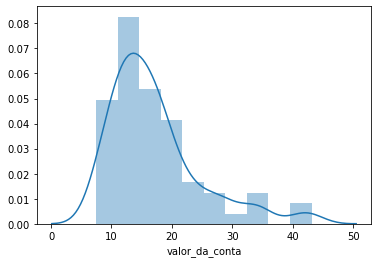

In [155]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

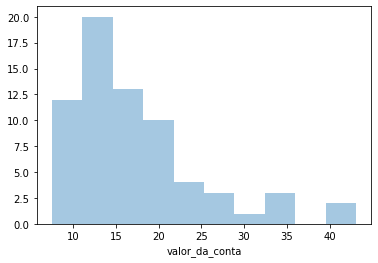

In [156]:
sns.distplot(almoco, kde = False)

In [162]:
jantar = gorjetas.query("hora_do_dia == 'Janta'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

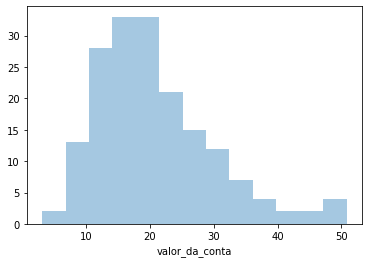

In [163]:
sns.distplot(jantar, kde = False)

In [165]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Janta,20.797159,3.102670,0.159773


### Teste de hipótese¶
#### A distribuição do valor da conta é igual no almoço e no jantar
#### ou
### A distribuição do valor da conta não é igual no almoço e no jantar

In [170]:
r3 = ranksums(jantar, almoco)

In [171]:
print('O valor do pvalue e {}'.format(r3.pvalue))

O valor do pvalue e 0.0011791039723641672


In [174]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [175]:
porcentagem_janta = gorjetas.query("hora_do_dia == 'Janta'").porcentagem

In [177]:
r4 = ranksums(porcentagem_janta, porcentagem_almoco)

In [178]:
r4

RanksumsResult(statistic=-1.1258018532735787, pvalue=0.2602493995587126)

#### A distribuição do valor da conta é igual no almoço e no jantar